<a href="https://colab.research.google.com/github/Mahabubjamil/ColabNotebook/blob/main/Copy_of_Final_Defense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk


In [ ]:
import csv
df = pd.read_csv('/content/Reviews.csv',encoding='utf-8',quoting=3, error_bad_lines=False)

Streaming output truncated to the last 5000 lines.
Skipping line 258682: expected 10 fields, saw 18
Skipping line 258684: expected 10 fields, saw 13
Skipping line 258685: expected 10 fields, saw 12
Skipping line 258686: expected 10 fields, saw 11
Skipping line 258688: expected 10 fields, saw 11
Skipping line 258689: expected 10 fields, saw 12
Skipping line 258690: expected 10 fields, saw 11
Skipping line 258691: expected 10 fields, saw 17
Skipping line 258692: expected 10 fields, saw 16
Skipping line 258693: expected 10 fields, saw 12
Skipping line 258694: expected 10 fields, saw 15
Skipping line 258695: expected 10 fields, saw 15
Skipping line 258698: expected 10 fields, saw 12
Skipping line 258699: expected 10 fields, saw 13
Skipping line 258700: expected 10 fields, saw 12
Skipping line 258701: expected 10 fields, saw 11
Skipping line 258702: expected 10 fields, saw 12
Skipping line 258703: expected 10 fields, saw 12
Skipping line 258704: expected 10 fields, saw 11
Skipping line 2587

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [ ]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [ ]:
print(df.shape)
df = df.head(5000)

(68791, 10)


In [ ]:
print(df.shape)

(5000, 10)


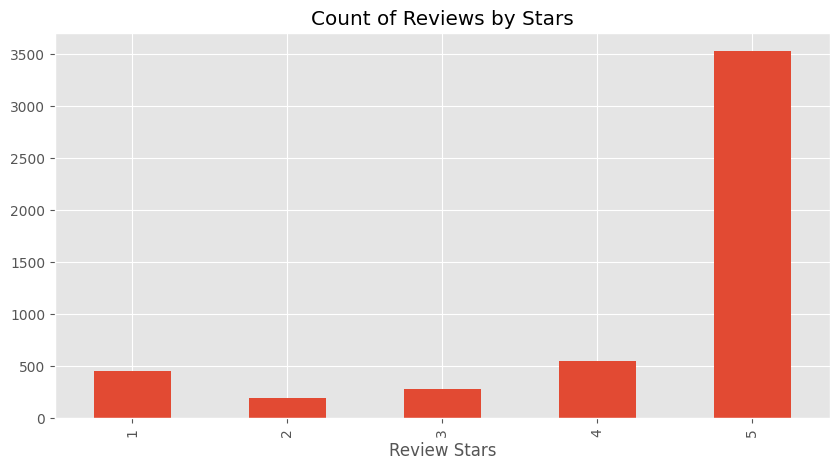

In [ ]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars',figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

In [ ]:
example = df['Text'][50]
print(example)

AWESOME!!! such a yummy flavor I got it as a healthy alternative to the desserts we normally eat and I am so glad that I did there are so many things you can do with Jello desserts and still have them taste good and be good for you. I will definitentally be purchasing this product again the flavor was so wonderful.


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['AWESOME', '!', '!', '!', 'such', 'a', 'yummy', 'flavor', 'I', 'got']

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('AWESOME', 'RB'),
 ('!', '.'),
 ('!', '.'),
 ('!', '.'),
 ('such', 'PDT'),
 ('a', 'DT'),
 ('yummy', 'JJ'),
 ('flavor', 'NN'),
 ('I', 'PRP'),
 ('got', 'VBD')]

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  AWESOME/RB
  !/.
  !/.
  !/.
  such/PDT
  a/DT
  yummy/JJ
  flavor/NN
  I/PRP
  got/VBD
  it/PRP
  as/IN
  a/DT
  healthy/JJ
  alternative/NN
  to/TO
  the/DT
  desserts/NNS
  we/PRP
  normally/RB
  eat/VBP
  and/CC
  I/PRP
  am/VBP
  so/RB
  glad/JJ
  that/IN
  I/PRP
  did/VBD
  there/EX
  are/VBP
  so/RB
  many/JJ
  things/NNS
  you/PRP
  can/MD
  do/VB
  with/IN
  (PERSON Jello/NNP)
  desserts/NNS
  and/CC
  still/RB
  have/VB
  them/PRP
  taste/VB
  good/JJ
  and/CC
  be/VB
  good/JJ
  for/IN
  you/PRP
  ./.
  I/PRP
  will/MD
  definitentally/RB
  be/VB
  purchasing/VBG
  this/DT
  product/NN
  again/RB
  the/DT
  flavor/NN
  was/VBD
  so/RB
  wonderful/JJ
  ./.)


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('This is the worst things ever!')

{'neg': 0.468, 'neu': 0.532, 'pos': 0.0, 'compound': -0.6588}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.9803}

In [ ]:
#Running the polarity scores in entire datasets
res = {}
for i, row in tqdm(df.iterrows(),total=len(df)):
  text = row['Text']
  myid = row['Id']
  res[myid]=sia.polarity_scores(text)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 17: {'neg': 0.097, 'neu': 0.694, 'pos': 0.209, 'compound': 0.7481},
 18: {'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.8883},
 20: {'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.6077},
 23: {'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.7687},
 24: {'neg': 0.085, 'neu': 0.771, 'pos': 0.143, 'compound': 0.2617},
 28: {'neg': 0.04, 'neu': 0.808, 'pos': 0.152, 'compound': 0.5956},
 43: {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.9441},
 45: {'neg': 0.031, 'neu': 0.778, 'pos': 0.191, 'compound': 0.8421}

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df,how='left')

In [ ]:
#now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,0.000,0.851,0.149,0.6369,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,0.000,0.705,0.295,0.8313,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


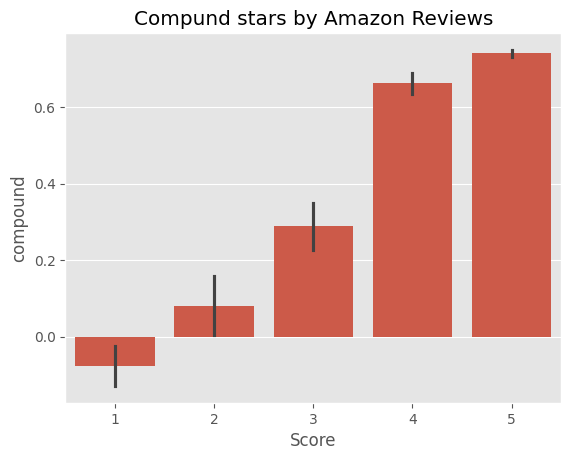

In [ ]:
ax = sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title('Compund stars by Amazon Reviews')
plt.show()

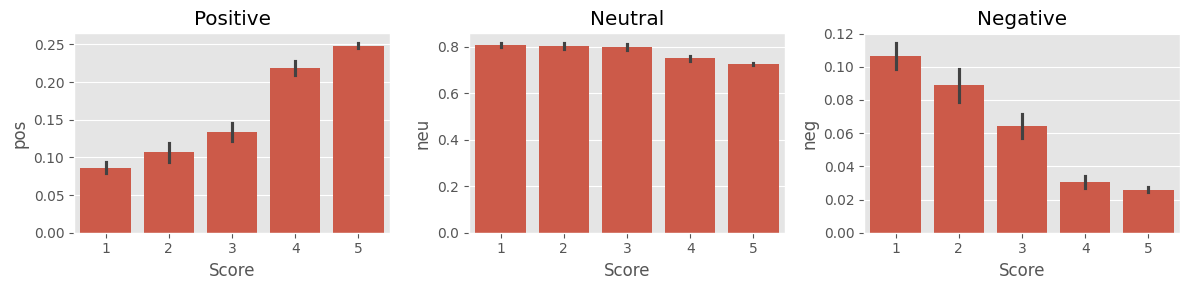

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [ ]:


def analyze_sentiment(text, rating):

    scores = sia.polarity_scores(text)

    compound_score = scores['compound']

    if compound_score >= 0.5 and rating == 5:
        sentiment = 'This product and service is excellent. Very Positive:'
    elif compound_score >= 0.05 and rating >= 4:
        sentiment = 'This product and service is good. Positive:'
    elif compound_score > -0.05 and rating >= 2:
        sentiment = 'This product and services need some improvements. Neutral:'
    elif compound_score <= -0.05 and rating < 2:
        sentiment = 'This product and services need urgent modifications. Negative:'
    else:
        sentiment = 'Need some modifications. Neutral:'

    print(f"Sentiment for '{text}' with rating: ({rating}) {sentiment} {compound_score}")


In [ ]:
analyze_sentiment('The XYZ Wireless Earbuds deliver impressive sound quality and seamless connectivity, making them my go-to choice for on-the-go music and calls. Their sleek design, comfortable fit, and long battery life make them a top-notch option for anyone with an active lifestyle.',5)

Sentiment for 'The XYZ Wireless Earbuds deliver impressive sound quality and seamless connectivity, making them my go-to choice for on-the-go music and calls. Their sleek design, comfortable fit, and long battery life make them a top-notch option for anyone with an active lifestyle.' with rating: (5) This product and service is excellent. Very Positive: 0.8957


In [ ]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
vaders.loc[(vaders['compound'] >= 0.5) & (vaders['Score'] <= 5), 'label'] = 'pos'
vaders.loc[(vaders['compound'] >= 0.5) & (vaders['Score'] >= 4), 'label'] = 'pos'
vaders.loc[(vaders['compound'] > -0.5) & (vaders['Score'] >= 2), 'label'] = 'nue'
vaders.loc[(vaders['compound'] <= -0.5) & (vaders['Score'] < 2), 'label'] = 'neg'


In [ ]:
vaders.loc[(vaders['compound'] >= 0.5), 'label'] = 'pos'
vaders.loc[(vaders['compound'] < 0.5) & (vaders['compound'] > -0.5), 'label'] = 'nue'
vaders.loc[(vaders['compound'] <= -0.5), 'label'] = 'neg'

In [ ]:
vaders.head(5)


,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,label
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,pos
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu...",neg
2,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,nue
3,9,0.000,0.851,0.149,0.6369,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,pos
4,10,0.000,0.705,0.295,0.8313,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,pos


In [ ]:
vaders.loc[(vaders['label']=='pos'), 'New_label'] = 2
vaders.loc[(vaders['label']=='nue'), 'New_label'] = 1
vaders.loc[(vaders['label']=='neg'), 'New_label'] = 0

In [ ]:
vaders.loc[(vaders['label']=='pos'), 'Suggestion'] = 'This product and service is good.can carry on with this.'
vaders.loc[(vaders['label']=='nue'), 'Suggestion'] = 'This product and services need some improvements.'
vaders.loc[(vaders['label']=='neg'), 'Suggestion'] = 'This product and services need urgent modifications.'

In [ ]:
vaders.head(5)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,label,New_label,Suggestion
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,pos,2.0,This product and service is good.can carry on ...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu...",neg,0.0,This product and services need urgent modifica...
2,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,nue,1.0,This product and services need some improvements.
3,9,0.000,0.851,0.149,0.6369,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,pos,2.0,This product and service is good.can carry on ...
4,10,0.000,0.705,0.295,0.8313,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,pos,2.0,This product and service is good.can carry on ...


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:

# Assuming 'vaders' DataFrame and other imports are already defined

# Download the necessary NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')

# Initialize the SentimentIntensityAnalyzer (Vader)
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment using Vader
def classify_sentiment(text):
    compound_score = sia.polarity_scores(text)['compound']

    if compound_score >= 0.5:
        return 2  # Positive
    elif -0.5 <= compound_score < 0.5:  # Corrected condition
        return 1  # Neutral
    else:
        return 0  # Negative

# Apply sentiment classification to the entire dataset
vaders['predicted_label'] = vaders['Text'].apply(classify_sentiment)

# Separate the data into texts and labels
texts = vaders['Text']
labels = vaders['New_label']
predicted_labels = vaders['predicted_label']

# Split the dataset into training and testing sets
texts_train, texts_test, labels_train, labels_test, predicted_labels_train, predicted_labels_test_0 = train_test_split(
    texts, labels, predicted_labels, test_size=0.2, random_state=42
)

# Calculate accuracy
accuracy = accuracy_score(labels_test, predicted_labels_test_0)

# Display the accuracy and classification report
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(labels_test, predicted_labels_test_0))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        47
         1.0       1.00      1.00      1.00       203
         2.0       1.00      1.00      1.00       750

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



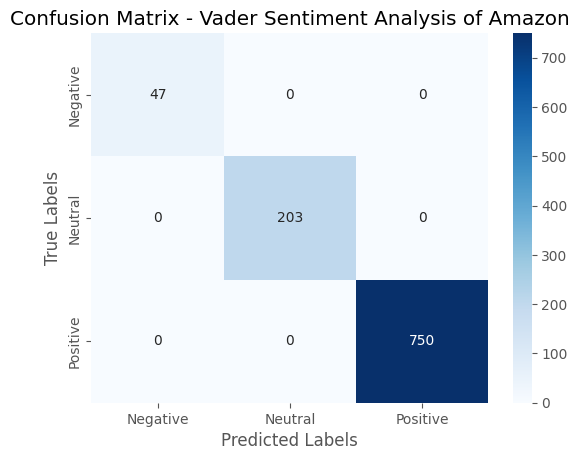

In [ ]:
# Calculate confusion matrix for Vader
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
conf_matrix_vader = confusion_matrix(labels_test, predicted_labels_test_0)

# Plot confusion matrix for Vader
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(conf_matrix_vader, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Vader Sentiment Analysis of Amazon')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Separate the data into texts and labels
texts = vaders['Text']
labels = vaders['New_label']

# Split the dataset into training and testing sets
texts_train, texts_test, labels_train, labels_test = train_test_split(
    texts, labels,test_size=0.2, random_state=42
)

# Convert text data to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

# Initialize and train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, labels_train)

# Predict labels on the testing set
predicted_labels_svm_0 = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(labels_test, predicted_labels_svm_0)

# Display the accuracy and classification report for SVM
print("SVM Model:")
print(f"Accuracy: {accuracy_svm * 100:.2f}%")
print("\nClassification Report:\n", classification_report(labels_test, predicted_labels_svm_0))


SVM Model:
Accuracy: 79.70%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.38      0.30      0.33        47
         1.0       0.55      0.58      0.57       203
         2.0       0.89      0.89      0.89       750

    accuracy                           0.80      1000
   macro avg       0.61      0.59      0.60      1000
weighted avg       0.80      0.80      0.80      1000



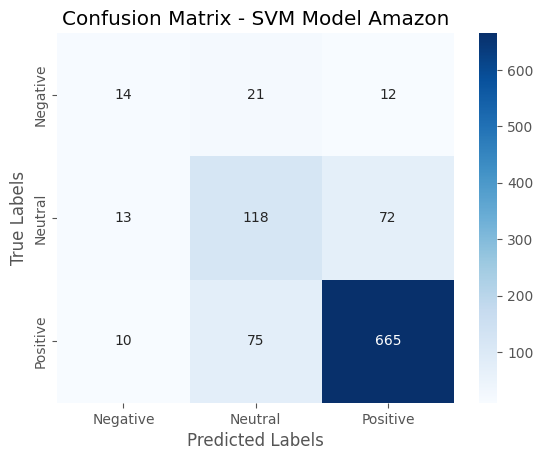

In [ ]:
# Calculate confusion matrix for SVM
conf_matrix_svm = confusion_matrix(labels_test, predicted_labels_svm_0)

# Plot confusion matrix for SVM
labels = ['Negative', 'Neutral', 'Positive']  # Adjust labels based on your classes
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM Model Amazon')
plt.show()

In [ ]:


# Separate the data into texts and labels
texts = vaders['Text']
labels = vaders['New_label']

# Split the dataset into training and testing sets
texts_train, texts_test, labels_train, labels_test = train_test_split(
    texts, labels,test_size=0.2, random_state=42
)

# Convert text data to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

# Initialize and train a Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, labels_train)

# Predict labels on the testing set
predicted_labels_nb_0 = naive_bayes_classifier.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(labels_test, predicted_labels_nb_0)

# Display the accuracy and classification report for Naive Bayes
print("Naive Bayes Model:")
print(f"Accuracy: {accuracy_nb * 100:.2f}%")
print("\nClassification Report:\n", classification_report(labels_test, predicted_labels_nb_0))


Naive Bayes Model:
Accuracy: 77.40%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        47
         1.0       0.57      0.18      0.28       203
         2.0       0.79      0.98      0.87       750

    accuracy                           0.77      1000
   macro avg       0.45      0.39      0.38      1000
weighted avg       0.71      0.77      0.71      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


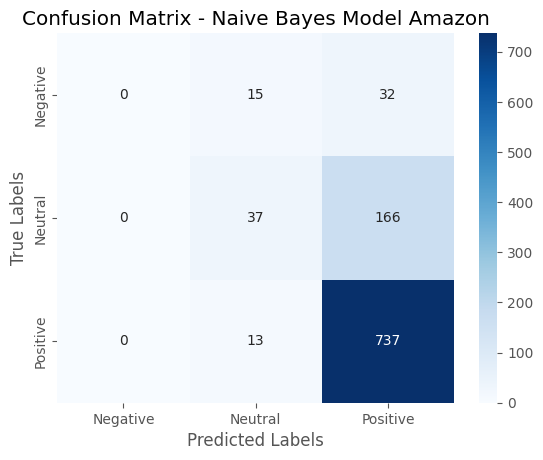

In [ ]:
# Calculate confusion matrix for Naive Bayes
conf_matrix_nb = confusion_matrix(labels_test, predicted_labels_nb_0)

# Plot confusion matrix for Naive Bayes
labels = ['Negative', 'Neutral', 'Positive']  # Adjust labels based on your classes
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Naive Bayes Model Amazon')
plt.show()

In [ ]:
label_counts = vaders['label'].value_counts()

In [ ]:
count_pos = label_counts.get('pos', 0)
count_neg = label_counts.get('neg', 0)
count_neu = label_counts.get('nue', 0)

print(f"The number of positive labels is: {count_pos}")
print(f"The number of negative labels is: {count_neg}")
print(f"The number of neutral labels is: {count_neu}")

The number of positive labels is: 3731
The number of negative labels is: 237
The number of neutral labels is: 1032


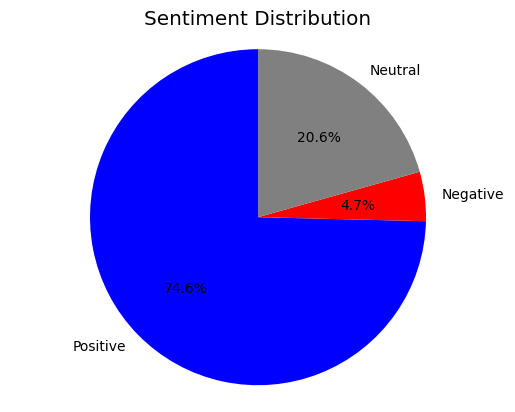

In [ ]:
labels = ['Positive', 'Negative', 'Neutral']
sizes = [count_pos, count_neg, count_neu]
colors = ['blue', 'red', 'gray']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
user_input = input("Enter a text for sentiment analysis: ")
user_input_vectorized = vectorizer.transform([user_input])
user_sentiment = svm_classifier.predict(user_input_vectorized)[0]

# Display the predicted sentiment
if user_sentiment == 2:
    print("Predicted Sentiment: Positive")
elif user_sentiment == 1:
    print("Predicted Sentiment: Neutral")
else:
    print("Predicted Sentiment: Negative")

Enter a text for sentiment analysis: I love this product
Predicted Sentiment: Positive


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                                   Text pred_label  cluster
0     I have bought several of the Vitality canned d...        pos        2
1     "Product arrived labeled as Jumbo Salted Peanu...        neg        2
2     If you are looking for the secret ingredient i...        neu        2
3     Right now I'm mostly just sprouting this so my...        pos        2
4     This is a very healthy dog food. Good for thei...        pos        2
...                                                 ...        ...      ...
4995  Don't buy this soil; it's full of flying black...        neu        2
4996  I use to buy this all the time with no problem...        neu        2
4997  Don't the sellers read these reviews and say s...        neu        2
4998  I have used this brand potting mix now for 3 s...        neg        2
4999  I write this in 2011.  I bought many bags of M...        pos        2

[5000 rows x 3 columns]


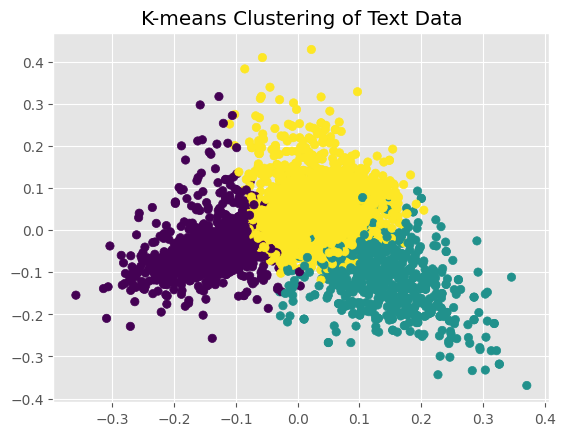

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming df is your DataFrame with columns 'Text' and 'compound'
threshold = -0.5
vaders['pred_label'] = pd.cut(vaders['compound'], bins=[-float('inf'), threshold, 0, float('inf')],
                           labels=['neg', 'neu', 'pos'], include_lowest=True)

# Use TF-IDF to vectorize the text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(vaders['Text'])

# Use PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Use K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
vaders['cluster'] = kmeans.fit_predict(X)

# Print the results
print(vaders[['Text', 'pred_label', 'cluster']])

# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=vaders['cluster'], cmap='viridis')
plt.title('K-means Clustering of Text Data')
plt.show()

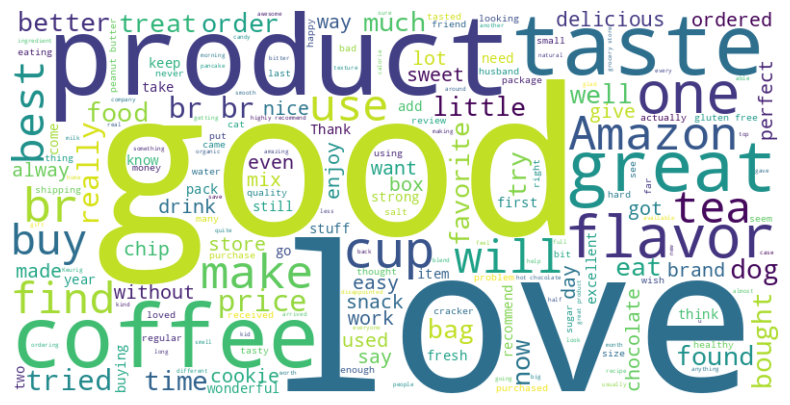

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'vaders' DataFrame and other imports are already defined
# Assuming 'texts' is a list or Series containing the text data

# Combine all texts into a single string
all_text = ' '.join(texts)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Daraz dataset


In [ ]:
import pandas as pd

df1 = pd.read_csv('/content/daraz-code-mixed-product-reviews.csv')

df1['Index'] = range(1, len(df1) + 1)

In [ ]:
df1.head(10)

,Sentiments,Reviews,Index
0,negative,Stuff and design was totally changed. cheap qu...,1
1,positive,"i got my parxel before time,sorry for late rev...",2
2,positive,So far so good..... Bought it only because it ...,3
3,neutral,Received as described but not suitable such ha...,4
4,positive,Received on time and in a safely packed box. T...,5
5,positive,satisfied 🤩,6
6,positive,Seller is very cooperative plus sent the same ...,7
7,negative,checked this device in 3 cars at a time but no...,8
8,positive,good quality and fresh 👍 at given time,9
9,negative,"not fresh, very small",10


In [ ]:
print(df1.shape)
df1 = df1.head(5000)

(16990, 3)


In [ ]:
print(df1.shape)

(5000, 3)


In [ ]:
example_d = df1['Reviews'][50]
print(example_d)

Highly Recommended


In [ ]:
sia.polarity_scores(example_d)

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.2716}

In [ ]:
#Running the polarity scores in entire datasets
res1 = {}
for i, row in tqdm(df1.iterrows(),total=len(df1)):
  text = row['Reviews']
  myid = row['Index']
  res1[myid]=sia.polarity_scores(text)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
res1

{1: {'neg': 0.206, 'neu': 0.794, 'pos': 0.0, 'compound': -0.3252},
 2: {'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'compound': 0.7717},
 3: {'neg': 0.065, 'neu': 0.801, 'pos': 0.134, 'compound': 0.4019},
 4: {'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'compound': 0.1139},
 5: {'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.915},
 6: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4215},
 7: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 8: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 9: {'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compound': 0.6369},
 10: {'neg': 0.395, 'neu': 0.605, 'pos': 0.0, 'compound': -0.2411},
 11: {'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.2382},
 12: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 13: {'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.6705},
 14: {'neg': 0.237, 'neu': 0.763, 'pos': 0.0, 'compound': -0.4767},
 15: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404},
 16: {'neg': 0.0, 'neu': 0.553,

In [ ]:
daraz = pd.DataFrame(res1).T
daraz = daraz.reset_index().rename(columns={'index': 'Index'})
daraz = daraz.merge(df1,how='left')

In [ ]:
daraz.head()

,Index,neg,neu,pos,compound,Sentiments,Reviews
0,1,0.206,0.794,0.000,-0.3252,negative,Stuff and design was totally changed. cheap qu...
1,2,0.000,0.729,0.271,0.7717,positive,"i got my parxel before time,sorry for late rev..."
2,3,0.065,0.801,0.134,0.4019,positive,So far so good..... Bought it only because it ...
3,4,0.000,0.884,0.116,0.1139,neutral,Received as described but not suitable such ha...
4,5,0.000,0.727,0.273,0.9150,positive,Received on time and in a safely packed box. T...


In [ ]:
daraz.loc[daraz['compound'] >= 0.5, 'label'] = 'pos'
daraz.loc[(daraz['compound'] >= -0.5) & (daraz['compound'] < 0.5), 'label'] = 'nue'
daraz.loc[daraz['compound'] <= -0.5, 'label'] = 'neg'


In [ ]:
# Assuming 'Sentiments' is a column in the 'daraz' DataFrame
daraz = daraz.drop('Sentiments', axis=1)


In [ ]:
daraz.head()

,Index,neg,neu,pos,compound,Reviews,label
0,1,0.206,0.794,0.000,-0.3252,Stuff and design was totally changed. cheap qu...,nue
1,2,0.000,0.729,0.271,0.7717,"i got my parxel before time,sorry for late rev...",pos
2,3,0.065,0.801,0.134,0.4019,So far so good..... Bought it only because it ...,nue
3,4,0.000,0.884,0.116,0.1139,Received as described but not suitable such ha...,nue
4,5,0.000,0.727,0.273,0.9150,Received on time and in a safely packed box. T...,pos


In [ ]:
daraz.loc[(daraz['label']=='pos'), 'New_label'] = 2
daraz.loc[(daraz['label']=='nue'), 'New_label'] = 1
daraz.loc[(daraz['label']=='neg'), 'New_label'] = 0

In [ ]:
daraz.head()

,Index,neg,neu,pos,compound,Reviews,label,New_label
0,1,0.206,0.794,0.000,-0.3252,Stuff and design was totally changed. cheap qu...,nue,1.0
1,2,0.000,0.729,0.271,0.7717,"i got my parxel before time,sorry for late rev...",pos,2.0
2,3,0.065,0.801,0.134,0.4019,So far so good..... Bought it only because it ...,nue,1.0
3,4,0.000,0.884,0.116,0.1139,Received as described but not suitable such ha...,nue,1.0
4,5,0.000,0.727,0.273,0.9150,Received on time and in a safely packed box. T...,pos,2.0


In [ ]:
label_counts_1 = daraz['label'].value_counts()

In [ ]:
label_counts_1

nue    2356
pos    2175
neg     469
Name: label, dtype: int64

In [ ]:
count_pos = label_counts_1.get('pos', 0)
count_neg = label_counts_1.get('neg', 0)
count_neu = label_counts_1.get('nue', 0)

print(f"The number of positive labels is: {count_pos}")
print(f"The number of negative labels is: {count_neg}")
print(f"The number of neutral labels is: {count_neu}")

The number of positive labels is: 2175
The number of negative labels is: 469
The number of neutral labels is: 2356


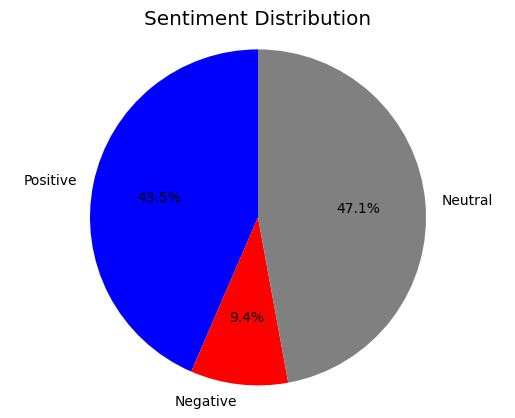

In [ ]:
labels = ['Positive', 'Negative', 'Neutral']
sizes = [count_pos, count_neg, count_neu]
colors = ['blue', 'red', 'gray']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
X = daraz['Reviews']
y = daraz['label']

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
y_pred_sgd_cv = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
sgd_clf.fit(X_train, y_train)
y_pred_sgd_val = sgd_clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

report_sgd_cv = classification_report(y_train, y_pred_sgd_cv)

print(report_sgd_cv)

              precision    recall  f1-score   support

         neg       0.74      0.63      0.68       375
         nue       0.80      0.85      0.82      1885
         pos       0.86      0.82      0.84      1740

    accuracy                           0.82      4000
   macro avg       0.80      0.77      0.78      4000
weighted avg       0.82      0.82      0.82      4000



In [ ]:
report_sgd_val = classification_report(y_test, y_pred_sgd_val)

print(report_sgd_val)

              precision    recall  f1-score   support

         neg       0.59      0.57      0.58        94
         nue       0.79      0.84      0.81       471
         pos       0.88      0.83      0.85       435

    accuracy                           0.81      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.81      0.81      0.81      1000



In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'vaders' DataFrame and other imports are already defined

# Download the necessary NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')

# Initialize the SentimentIntensityAnalyzer (Vader)
sia = SentimentIntensityAnalyzer()

def classify_sentiment(text):
    compound_score = sia.polarity_scores(text)['compound']

    if compound_score >= 0.5:
        return 2  # Positive
    elif -0.5 <= compound_score < 0.5:  # Corrected condition
        return 1  # Neutral
    else:
        return 0  # Negative


# Apply sentiment classification to the entire dataset
daraz['predicted_label'] = daraz['Reviews'].apply(classify_sentiment)

# Separate the data into texts and labels
texts = daraz['Reviews']
labels = daraz['New_label']
predicted_labels = daraz['predicted_label']

# Split the dataset into training and testing sets
texts_train, texts_test, labels_train, labels_test, predicted_labels_train, predicted_labels_test = train_test_split(
    texts, labels, predicted_labels, test_size=0.2, random_state=42
)

# Calculate accuracy
accuracy = accuracy_score(labels_test, predicted_labels_test)

# Display the accuracy and classification report
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(labels_test, predicted_labels_test))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        95
         1.0       1.00      1.00      1.00       467
         2.0       1.00      1.00      1.00       438

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        95
         1.0       1.00      1.00      1.00       467
         2.0       1.00      1.00      1.00       438

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



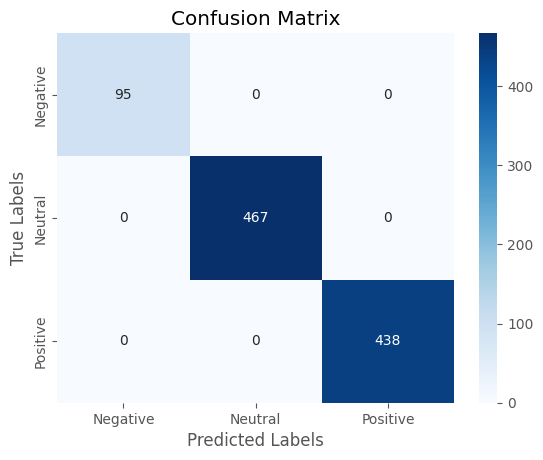

In [ ]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Assuming 'daraz' DataFrame and other imports are already defined

# ... (Rest of your code)

# Display the accuracy and classification report
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(labels_test, predicted_labels_test))

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels_test, predicted_labels_test)

# Plot confusion matrix
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Separate the data into texts and labels
texts = daraz['Reviews']
labels = daraz['New_label']


# Split the dataset into training and testing sets
texts_train, texts_test, labels_train, labels_test = train_test_split(
    texts, labels,test_size=0.2, random_state=42
)

# Convert text data to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

# Initialize and train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, labels_train)

# Predict labels on the testing set
predicted_labels_svm = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(labels_test, predicted_labels_svm)

# Display the accuracy and classification report for SVM
print("SVM Model:")
print(f"Accuracy: {accuracy_svm * 100:.2f}%")
print("\nClassification Report:\n", classification_report(labels_test, predicted_labels_svm))


SVM Model:
Accuracy: 83.80%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.64      0.63      0.63        95
         1.0       0.82      0.85      0.84       467
         2.0       0.90      0.87      0.88       438

    accuracy                           0.84      1000
   macro avg       0.79      0.78      0.79      1000
weighted avg       0.84      0.84      0.84      1000



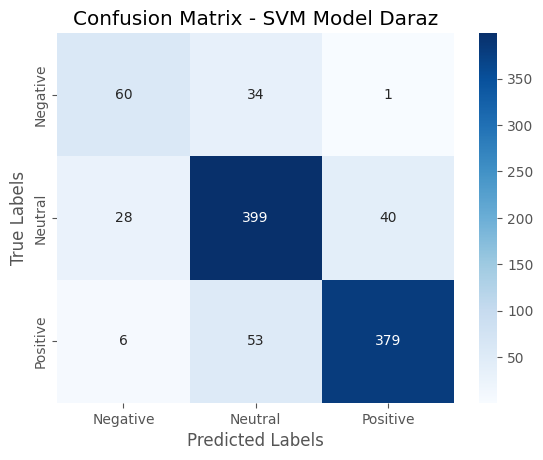

In [ ]:
# Calculate confusion matrix for SVM
conf_matrix_svm = confusion_matrix(labels_test, predicted_labels_svm)

# Plot confusion matrix for SVM
labels = ['Negative', 'Neutral', 'Positive']  # Adjust labels based on your classes
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM Model Daraz')
plt.show()

In [ ]:


# Separate the data into texts and labels
texts = daraz['Reviews']
labels = daraz['New_label']

# Split the dataset into training and testing sets
texts_train, texts_test, labels_train, labels_test = train_test_split(
    texts, labels,test_size=0.2, random_state=42
)

# Convert text data to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

# Initialize and train a Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, labels_train)

# Predict labels on the testing set
predicted_labels_nb = naive_bayes_classifier.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(labels_test, predicted_labels_nb)

# Display the accuracy and classification report for Naive Bayes
print("Naive Bayes Model:")
print(f"Accuracy: {accuracy_nb * 100:.2f}%")
print("\nClassification Report:\n", classification_report(labels_test, predicted_labels_nb))


Naive Bayes Model:
Accuracy: 72.10%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.47      0.57        95
         1.0       0.76      0.61      0.67       467
         2.0       0.70      0.90      0.79       438

    accuracy                           0.72      1000
   macro avg       0.72      0.66      0.68      1000
weighted avg       0.73      0.72      0.71      1000



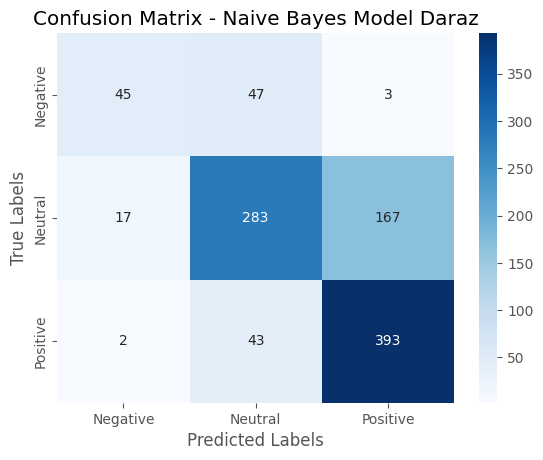

In [ ]:
conf_matrix_nb = confusion_matrix(labels_test, predicted_labels_nb)

# Plot confusion matrix for Naive Bayes
labels = ['Negative', 'Neutral', 'Positive']  # Adjust labels based on your classes
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Naive Bayes Model Daraz')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                                Reviews pred_label  cluster
0     Stuff and design was totally changed. cheap qu...        neu        0
1     i got my parxel before time,sorry for late rev...        pos        0
2     So far so good..... Bought it only because it ...        pos        0
3     Received as described but not suitable such ha...        pos        0
4     Received on time and in a safely packed box. T...        pos        0
...                                                 ...        ...      ...
4995  amazing quality great daraz amazing daraz deli...        pos        0
4996                                AMAZING PRODUCT!!!!        pos        0
4997  alo axhe size bi bri h but ek alo kharab h u c...        neu        0
4998  The shoes are comfy and great in such a reason...        pos        0
4999        satisfied with the product. thankyou seller        pos        0

[5000 rows x 3 columns]


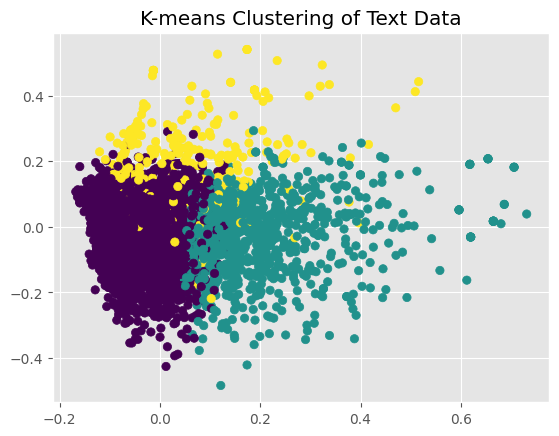

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming df is your DataFrame with columns 'Text' and 'compound'
threshold = -0.5
daraz['pred_label'] = pd.cut(daraz['compound'], bins=[-float('inf'), threshold, 0, float('inf')],
                           labels=['neg', 'neu', 'pos'], include_lowest=True)

# Use TF-IDF to vectorize the text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(daraz['Reviews'])

# Use PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Use K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
daraz['cluster'] = kmeans.fit_predict(X)

# Print the results
print(daraz[['Reviews', 'pred_label', 'cluster']])

# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=daraz['cluster'], cmap='viridis')
plt.title('K-means Clustering of Text Data')
plt.show()

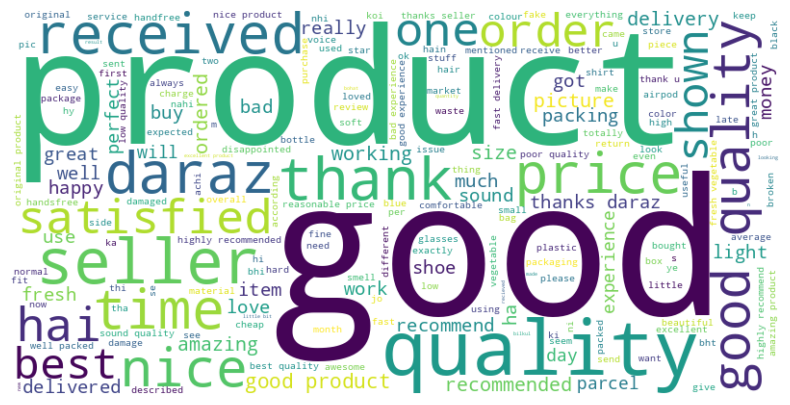

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'daraz' DataFrame is defined and contains a 'Reviews' column
# Replace 'Reviews' with the actual column containing your text data

# Combine all texts into a single string
all_text = ' '.join(daraz['Reviews'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


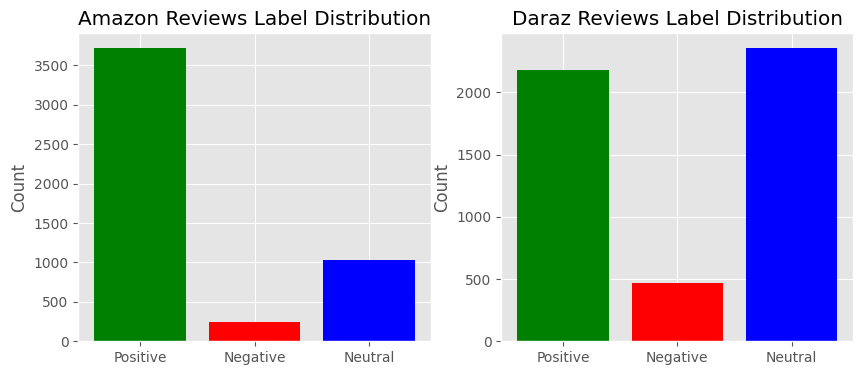

In [ ]:
import matplotlib.pyplot as plt

# Output-1
labels_output_1 = ['Positive', 'Negative', 'Neutral']
counts_output_1 = [3722, 250, 1028]

# Output-2
labels_output_2 = ['Positive', 'Negative', 'Neutral']
counts_output_2 = [2175, 469, 2356]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Bar chart for Output-1
ax1.bar(labels_output_1, counts_output_1, color=['green', 'red', 'blue'])
ax1.set_title('Amazon Reviews Label Distribution')
ax1.set_ylabel('Count')

# Bar chart for Output-2
ax2.bar(labels_output_2, counts_output_2, color=['green', 'red', 'blue'])
ax2.set_title('Daraz Reviews Label Distribution')
ax2.set_ylabel('Count')

plt.show()


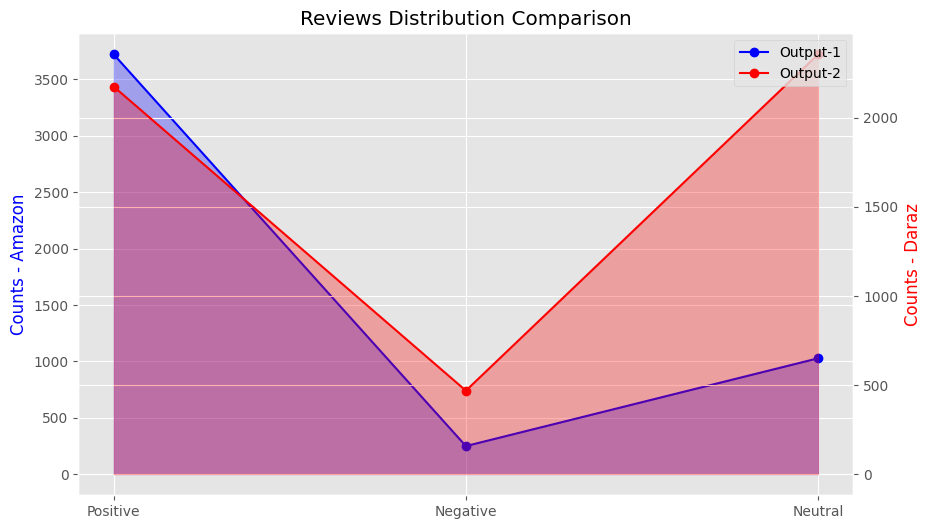

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Output-1
labels_output_1 = ['Positive', 'Negative', 'Neutral']
counts_output_1 = [3722, 250, 1028]

# Output-2
labels_output_2 = ['Positive', 'Negative', 'Neutral']
counts_output_2 = [2175, 469, 2356]

# Generate x-axis positions for bars
x_positions = np.arange(len(labels_output_1))

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Line chart with fill for Output-1
ax1.plot(x_positions, counts_output_1, marker='o', linestyle='-', color='b', label='Output-1')
ax1.fill_between(x_positions, counts_output_1, color='b', alpha=0.3)

# Line chart with fill for Output-2
ax2 = ax1.twinx()
ax2.plot(x_positions, counts_output_2, marker='o', linestyle='-', color='r', label='Output-2')
ax2.fill_between(x_positions, counts_output_2, color='r', alpha=0.3)

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Set labels and title
ax1.set_xticks(x_positions)
ax1.set_xticklabels(labels_output_1)
ax1.set_ylabel('Counts - Amazon', color='b')
ax2.set_ylabel('Counts - Daraz', color='r')
plt.title('Reviews Distribution Comparison')

plt.show()


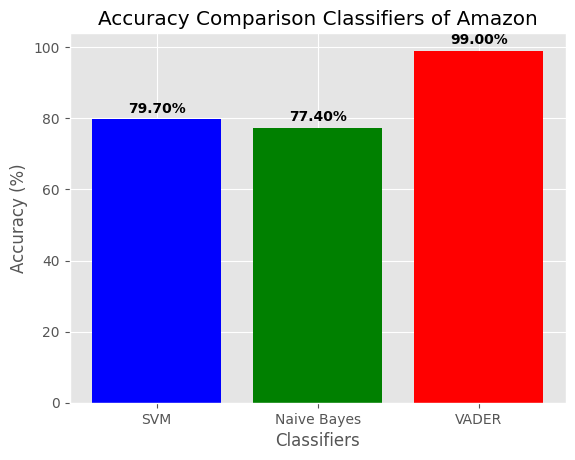

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values
svm_accuracy = 79.70
naive_bayes_accuracy = 77.40
vader_accuracy = 99.00

# Labels for the bars
labels = ['SVM', 'Naive Bayes', 'VADER']

# Accuracy values for each classifier
accuracies = [svm_accuracy, naive_bayes_accuracy, vader_accuracy]

# Plotting the bar graph
plt.bar(labels, accuracies, color=['blue', 'green', 'red'])

# Adding labels and title
plt.xlabel('Classifiers')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison Classifiers of Amazon')

# Display the percentage values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontweight='bold')

# Show the plot
plt.show()



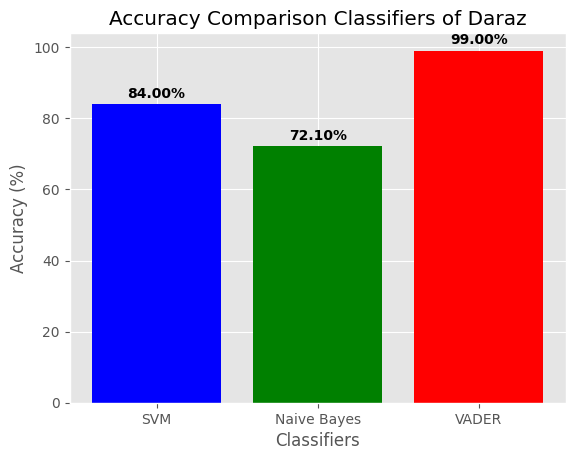

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values
svm_accuracy = 84
naive_bayes_accuracy = 72.10
vader_accuracy = 99.00

# Labels for the bars
labels = ['SVM', 'Naive Bayes', 'VADER']

# Accuracy values for each classifier
accuracies = [svm_accuracy, naive_bayes_accuracy, vader_accuracy]

# Plotting the bar graph
plt.bar(labels, accuracies, color=['blue', 'green', 'red'])

# Adding labels and title
plt.xlabel('Classifiers')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison Classifiers of Daraz')

# Display the percentage values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontweight='bold')

# Show the plot
plt.show()
